*The script to create the submission is in the end of the file.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In /home/jardel/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/jardel/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/jardel/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /home/jardel/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/jardel/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


# Reading traind and test files


In [2]:
train = pd.read_csv("data/train.csv").drop("Id",axis=1)
train.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv("data/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Initial Linear Regression model (no feature engineering)


The initial submission provided by Kaggle got a RMSE of 0.40613.

This Linear Regression model with all num columns and no feature engineering got a RMSE of 0.33124.

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X = train.select_dtypes(include=numerics).fillna(-1)
y = X["SalePrice"]
X = X.drop("SalePrice",axis=1)

model = LinearRegression()
model.fit(X,y)
p = model.predict(test.select_dtypes(include=numerics).fillna(-1))





ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 36 is different from 37)

# EDA

In [ ]:
sns.set_style('whitegrid')

In [7]:
print(train.shape, test.shape)


(1460, 80) (1459, 80)


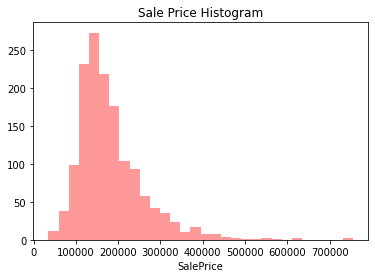

In [8]:
sns.distplot(train["SalePrice"], bins=30,kde=False,color='red')
plt.title("Sale Price Histogram")
plt.show()

Text(0.5, 1.0, 'Sale Price Boxplot')

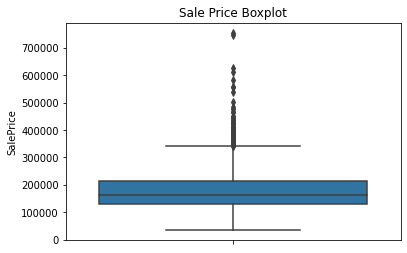

In [9]:
sns.boxplot(y="SalePrice",data=train)
plt.title("Sale Price Boxplot")


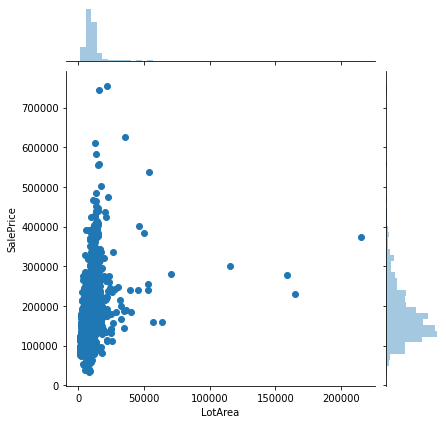

In [10]:
sns.jointplot(x="LotArea",y="SalePrice",data=train)


Text(0.5, 1.0, 'SalePrice divided by Alley Access')

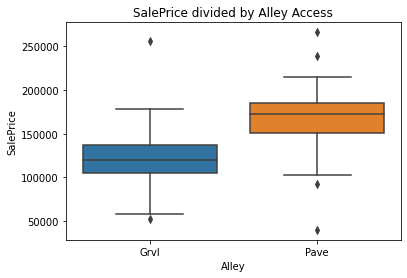

In [11]:
sns.boxplot(x="Alley",y="SalePrice",data=train)
plt.title("SalePrice divided by Alley Access")


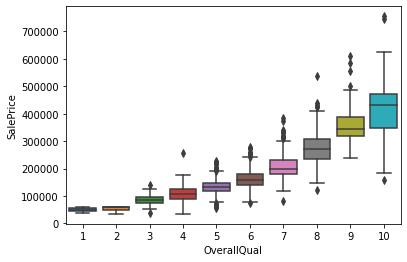

In [12]:
sns.boxplot(x="OverallQual",y="SalePrice",data=train)


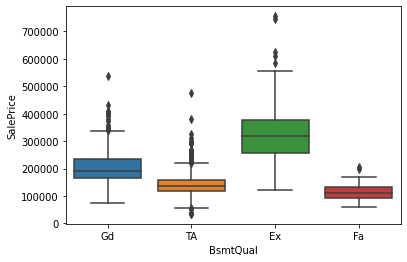

In [13]:
sns.boxplot(x="BsmtQual",y="SalePrice",data=train)

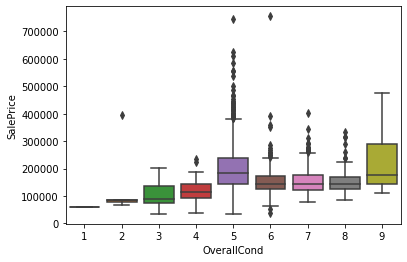

In [14]:
sns.boxplot(x="OverallCond",y="SalePrice",data=train)

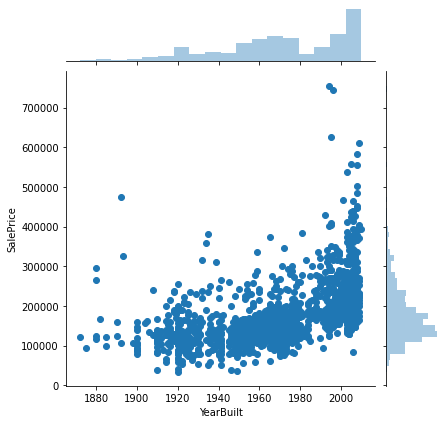

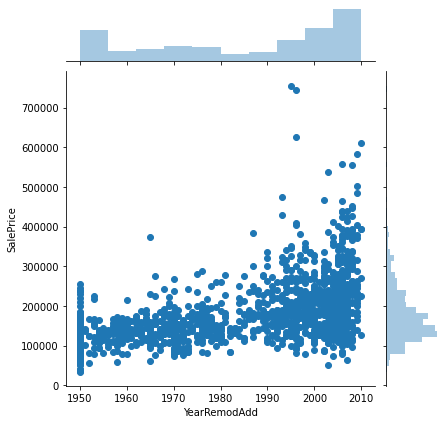

In [15]:
sns.jointplot(x="YearBuilt",y="SalePrice",data=train)
sns.jointplot(x="YearRemodAdd",y="SalePrice",data=train)


# Feature Engineering


In [6]:
#null values
print("Train: ")
for col in train.columns:
    if train[col].isnull().values.any():
        print(col, train[col].isnull().sum())
      
print("\nTest:")
for col in test.columns:
    if test[col].isnull().values.any():
        print(col, test[col].isnull().sum())
        
train = train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],axis=1)
test = test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],axis=1)

Train: 
LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406

Test:
MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


In [7]:
train["CentralAir"] = (train["CentralAir"]=="Y").astype(int)
test["CentralAir"] = (test["CentralAir"]=="Y").astype(int)
train["PavedDrive"] = (train["PavedDrive"]=="Y").astype(int)
test["PavedDrive"] = (test["PavedDrive"]=="Y").astype(int)
train["Street"] = (train["Street"]=="Pave").astype(int)
test["Street"] = (test["Street"]=="Pave").astype(int)


In [8]:
def categorical_eval(ev):
    if ev=="Ex":
        return 10.0
    if ev=="Gd":
        return 7.5
    if ev=="TA":
        return 5.0
    if ev=="Fa":
        return 2.5
    else:
        return 0

In [9]:
cat_eval_list = ["GarageCond","GarageQual","KitchenQual","HeatingQC",
                "BsmtCond","BsmtQual","ExterCond","ExterQual"]
for col in cat_eval_list:
    train[col] = train[col].apply(categorical_eval)
    test[col] = test[col].apply(categorical_eval)




# Validation

In [10]:

X = train.select_dtypes(include=numerics).fillna(-1)
y = X["SalePrice"]
X = X.drop("SalePrice",axis=1)

In [25]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [28]:
resultsLr = []
resultsGb = []
kf = KFold(5, shuffle=True, random_state=0)

for train_l, valid_l in kf.split(X):
    X_train, X_valid = X.iloc[train_l], X.iloc[valid_l]
    y_train,y_valid = y.iloc[train_l], y.iloc[valid_l]
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    p = model.predict(X_valid)
    rms = np.sqrt(mean_squared_error(y_valid, p))
    resultsLr.append(rms)
    
    model2 = GradientBoostingRegressor(random_state=10)
    model2.fit(X_train, y_train)
    p = model2.predict(X_valid)
    rms = np.sqrt(mean_squared_error(y_valid, p))
    resultsGb.append(rms)
    
    

In [27]:
print(np.mean(resultsGb))
print(np.mean(resultsLr))

26645.034385074257
34867.2423563053


# Create submission

In [23]:
X = train.select_dtypes(include=numerics).fillna(-1)
y = X["SalePrice"]
X = X.drop("SalePrice",axis=1)
model = GradientBoostingRegressor(random_state=0)
model.fit(X, y)
final_test = test
final_test = final_test.drop("Id",axis=1)
p = model.predict(final_test.select_dtypes(include=numerics).fillna(-1))

In [24]:
sub = pd.Series(p,index=test["Id"],name="SalePrice")
sub.to_csv("submission.csv",header=True)